In [26]:
"""
This program analyzes a dataset from the US Department of Health and Human Services: 
"Conditions Contributing to COVID-19 Deaths, by State and Age, 2020-2023."

It displays the medical conditions most contributing to deaths in the country as a whole, grouped together by disease group, as well
as further breaking down deaths by age group and year, as well as state and year. The intention of this analyis is to show
the trends that contributed the most regarding mortality of the virus. 

"""


import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

deaths = pd.read_csv('Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv',encoding='utf-8')
# Imports the dataset

deaths.head()

# Selects the first 5 rows of the dataset, providing an overview of the categories of data tracked. 

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,08/20/2023,01/01/2020,08/19/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,1566.0,1642.0,NaN
1,08/20/2023,01/01/2020,08/19/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,5788.0,6011.0,NaN
2,08/20/2023,01/01/2020,08/19/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,15055.0,15673.0,NaN
3,08/20/2023,01/01/2020,08/19/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,37373.0,38832.0,NaN
4,08/20/2023,01/01/2020,08/19/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,82513.0,85540.0,NaN


c:\Users\asokw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asokw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asokw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\asokw\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

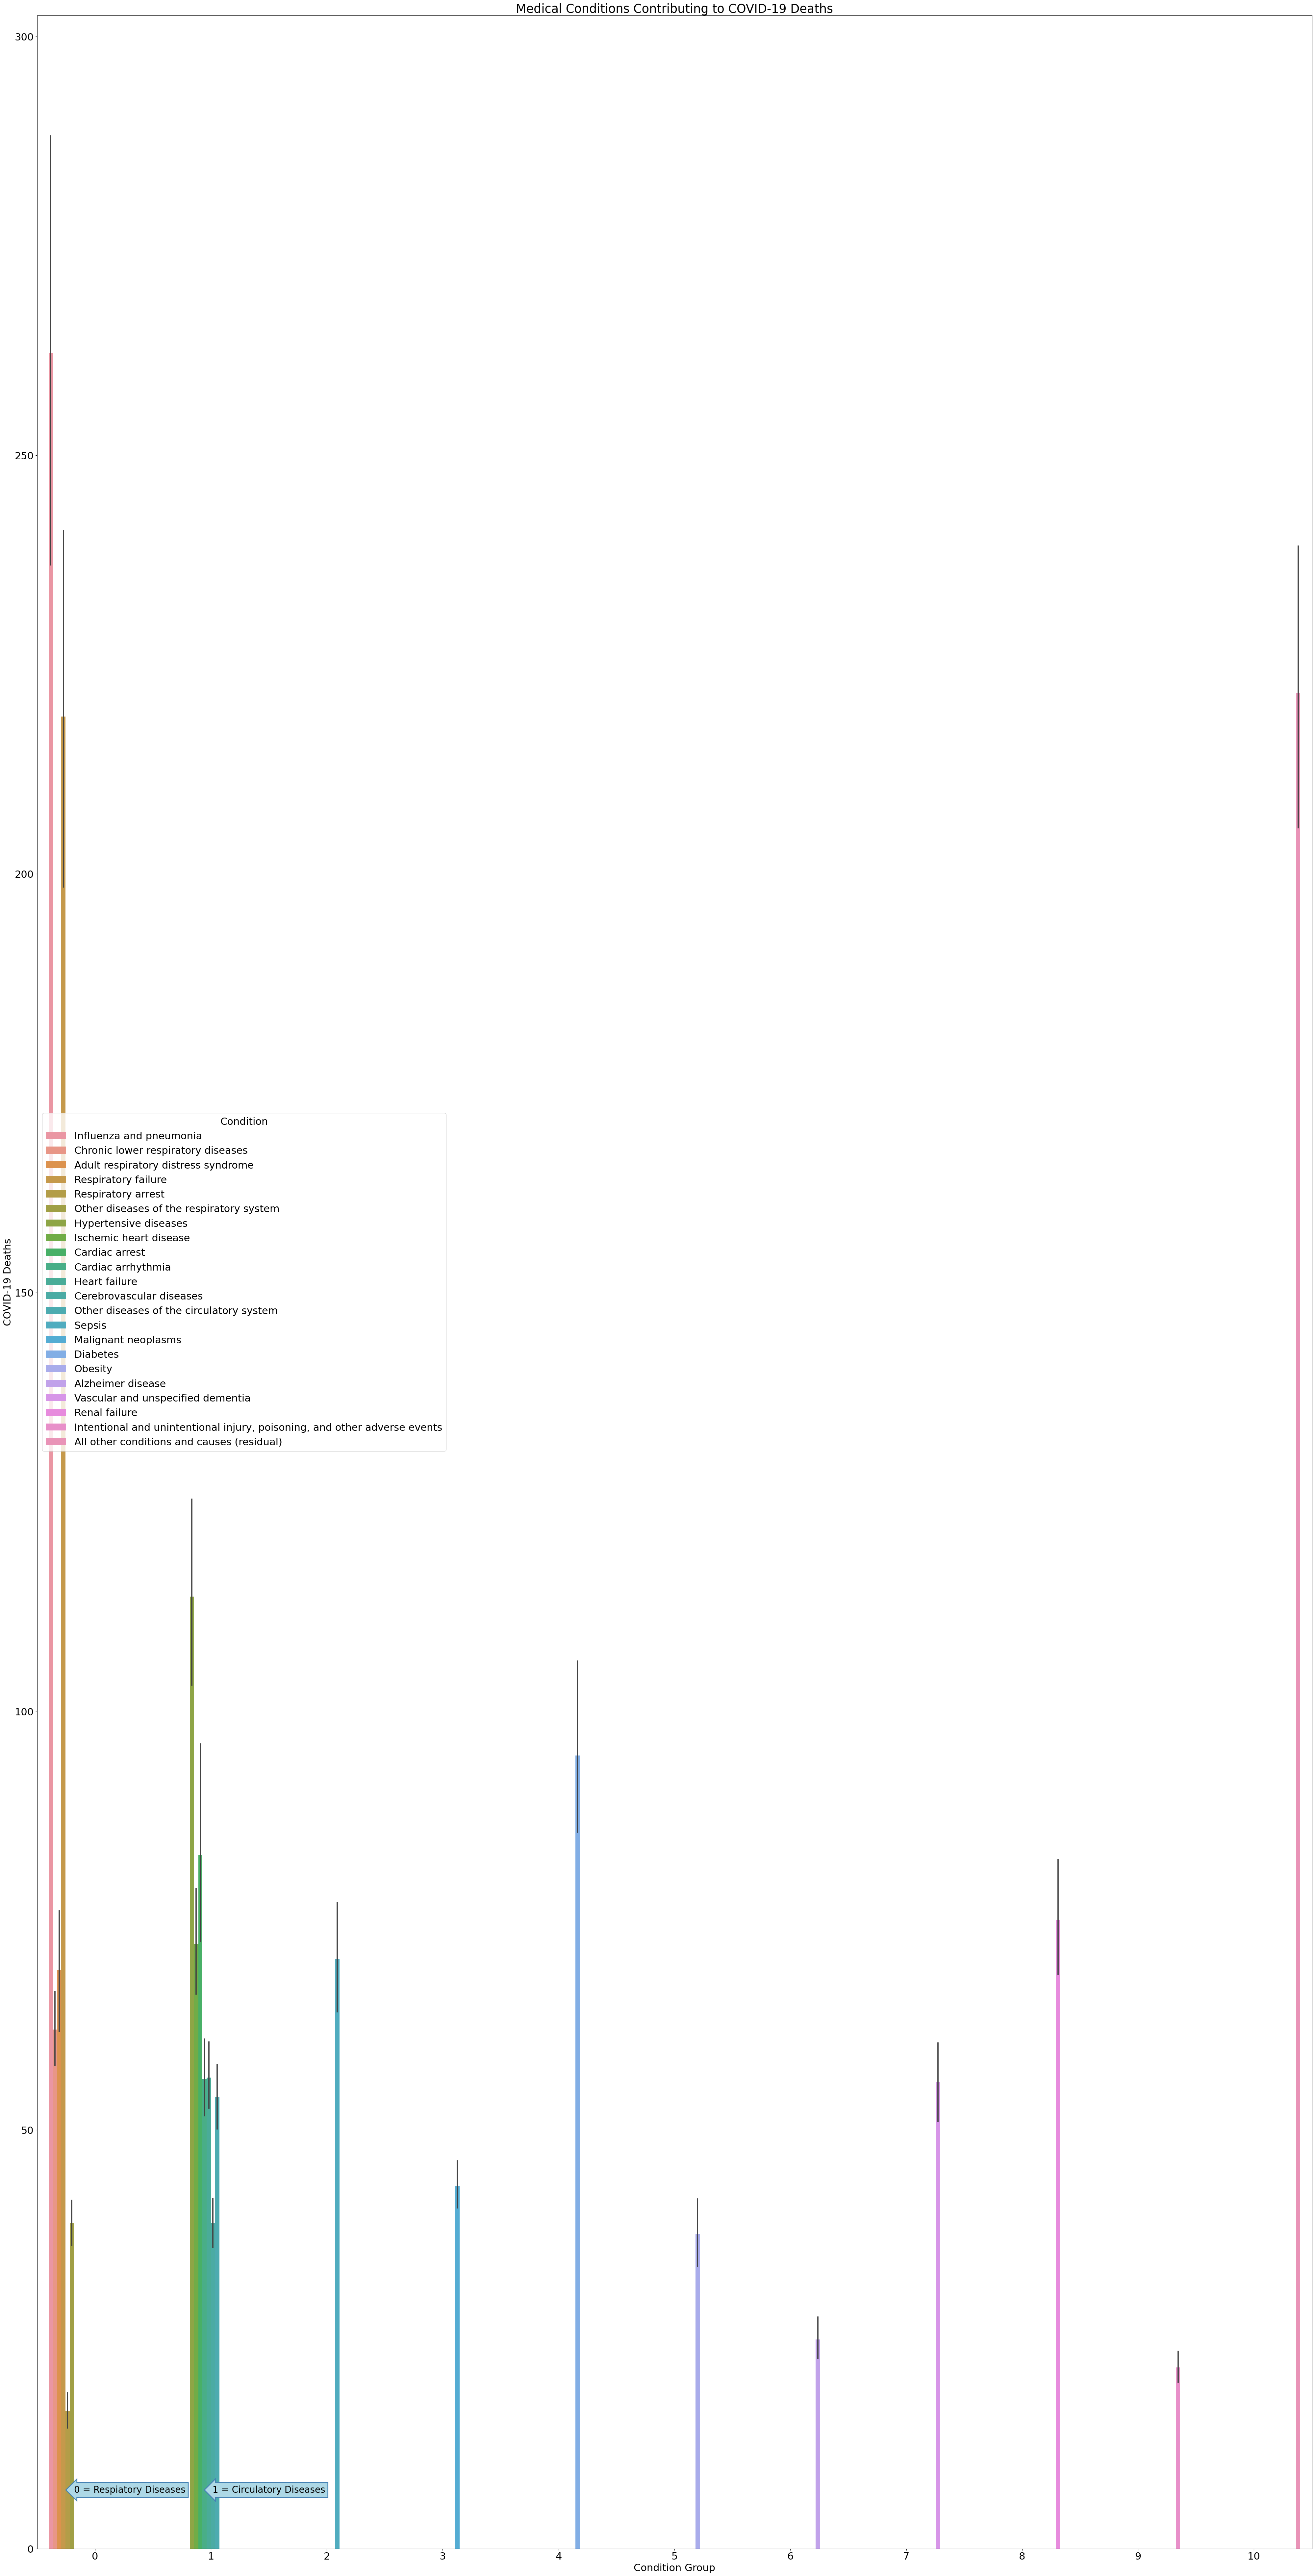

In [27]:
country = ["United States"]
by_total = ['By Total']
all_ages = ['All Ages']
covid = ['COVID-19']

deaths = deaths.dropna(subset="Month")
deaths = deaths.dropna(subset="COVID-19 Deaths")

states = ~deaths["State"].isin(country)
ages = deaths["Age Group"].isin(all_ages)
conditionstype = ~deaths["Condition Group"].isin(covid)

d = deaths[states & ages & conditionstype]

"""
Application of filters to ensure values are not duplicated and void values not included. 
The values are sorted using the 'By Total' category, counting all Covid-19 deaths in the country as a whole, among all age groups.
"""
x_val = list(range(0,11))

"""
Index values to replace condition group names. Apart from Respiatory and Circulatory Diseases, the disease group name
matches that of the disease itself, as there is only one disease in the group
"""
plt.figure(figsize=(50, 100))
g = sns.barplot(x=d["Condition Group"], y=d["COVID-19 Deaths"].dropna(), hue=d["Condition"])
plt.xlabel("Condition Group")
plt.ylabel('COVID-19 Deaths')
plt.title('Medical Conditions Contributing to COVID-19 Deaths')
plt.rcParams.update({'font.size': 50})

"""
Graphing a barplot, with the x-axis sections (index values) being the condition group, y-axis values being the amount of Covid-19 Deaths, 
and the bars representing the amount of deaths for each disease in the group.

"""
g.set_xticklabels(x_val)
g.text(0.3, 7, "0 = Respiatory Diseases",
            ha="center", va="center", rotation=0, size=20,
            bbox=dict(boxstyle="larrow,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

g.text(1.5, 7, "1 = Circulatory Diseases",
            ha="center", va="center", rotation=0, size=20,
            bbox=dict(boxstyle="larrow,pad=0.3",
                      fc="lightblue", ec="steelblue", lw=2))

# Assignment of Respiatory and Circulatory Diseases with the corresponding index value



plt.show()


In [28]:
not_stated = ['Not stated']

age_groups = ~deaths["Age Group"].isin(not_stated)
covid = deaths["Condition Group"].isin(covid)
age_deaths = deaths[states&age_groups&covid]

"""
Application of filters to ensure values are not duplicated and void values not included. 
The values are sorted using the 'Age Group' category, counting all Covid-19 deaths in the country as a whole by age group.
"""

age_deaths['Year']= age_deaths['Year'].astype(int)



# Ensuring data values (years) used for columns are shown as integers. 


age_counts = pd.pivot_table(age_deaths, values='COVID-19 Deaths', index=['Age Group'],
                       columns=['Year'], aggfunc="sum")
"""
Creating a table with each column representing a year, each row representing an age group and the table values being the 
sum of Covid-19 deaths for the corresponding age group and year. 
"""

age_counts['Age Group Totals'] = age_counts.sum(axis='columns')

# Creating an additional column totalling deaths for all 4 years for each age group. 

for col in age_counts: 
    age_counts[col] = age_counts[col].astype('int')

    
#  Ensuring data values of the table are displayed as integers. 
age_counts



C:\Users\asokw\AppData\Local\Temp\ipykernel_33988\4209521339.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_deaths['Year']= age_deaths['Year'].astype(int)


Year,2020,2021,2022,2023,Age Group Totals
Age Group,,,,,
0-24,220,1026,407,0,1653
25-34,1643,5822,1381,14,8860
35-44,5773,16502,3822,102,26199
45-54,17650,38960,10874,439,67923
55-64,45375,79297,30052,2688,157412
65-74,82323,111743,53229,7580,254875
75-84,106319,110811,67628,13406,298164
85+,122850,95216,73906,17934,309906
All Ages,386764,464893,248349,46405,1146411


In [29]:
state_deaths =  deaths[states&ages&covid]


"""
Application of filters to ensure values are not duplicated and void values not included. 
The values are sorted using the states, counting total Covid-19 deaths by each state and year. 
"""
state_deaths['Year']= state_deaths['Year'].astype(int)

# Ensuring data values (years) used for columns are shown as integers. 

state_counts = pd.pivot_table(state_deaths, values='COVID-19 Deaths', index=['State'],
                       columns=['Year'], fill_value=0, aggfunc="sum")

"""
Creating a table with each column representing a year, each row representing an state and the table values being the 
sum of Covid-19 deaths for the corresponding state and year. 
"""

state_counts['State Totals'] = state_counts.sum(axis='columns')
# Creating an additional column totalling deaths for all 4 years for each state. 

state_counts.loc[('Year Totals'), :] = state_counts.sum()

# Creating an additional row totalling deaths for all 4 years. 


for col in state_counts: 
    state_counts[col] = state_counts[col].astype('int')

    
#  Ensuring data values of the table are displayed as integers. 
state_counts

C:\Users\asokw\AppData\Local\Temp\ipykernel_33988\2071620555.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_deaths['Year']= state_deaths['Year'].astype(int)


Year,2020,2021,2022,2023,State Totals
State,,,,,
Alabama,6704,9719,4224,755,21402
Alaska,242,835,314,23,1414
Arizona,9321,14060,5905,948,30234
Arkansas,4027,5336,2772,453,12588
California,33483,48334,22419,4279,108515
Colorado,5073,6207,3413,628,15321
Connecticut,6291,3153,2580,486,12510
Delaware,1088,1266,867,194,3415
District of Columbia,1003,707,437,50,2197


In [30]:
"""
Conclusion: As shown in the graphs and tables above, it can be contriubted that diseases of a respiatory and circulatory effect
greatly impact one's chance of survival if they contract Covid-19. It can also be seen that deaths where highest in older age groups, 
approximately 75% of deaths were of those over the age of 65. The pace of the pandemic peaked in 2021 before declining markedly, with 2022
having aorund half of the amount of deaths as suffered in 2021 and 2023 having a quarter of that number so far. This corresponds with the 
vaccination program picking up pace in America throughout 2021. 
However, in areas hit hardest at the start of the pandemic, such as New York New Jersey, Massachusetts and other Northeastern states, 
the death count was highest in 2020, declining afterwards. It is also notable that the Department of Health and Human Services saw it fit to
record data from New York City seperately from the rest of the state, highlighting its disproportinate impact on the metropolis. 
Overall, the distrbution of deaths matched that of the most populus states and urban centers. 

All in all, suffering from a respiatory or circulatory disease, being of retirement age, and living in a highly populated state are 
three factors that greatly increase your chance of dying from Covid-19. While cases have markedly declinded in the past year, it is 
still important that those who fit into these risk groups remain vigilant, especially if unvaccinated. Hospitals should also have knowledge of and
be equipped with tools to treat with the complications caused by these factors, in order to ensure more American lives can be saved.  


"""

"\nConclusion: As shown in the graphs and tables above, it can be contriubted that diseases of a respiatory and circulatory effect\ngreatly impact one's chance of survival if they contract Covid-19. It can also be seen that deaths where highest in older age groups, \napproximately 75% of deaths were of those over the age of 65. The pace of the pandemic peaked in 2021 before declining markedly, with 2022\nhaving aorund half of the amount of deaths as suffered in 2021 and 2023 having a quarter of that number so far. This corresponds with the \nvaccination program picking up pace in America throughout 2021. \nHowever, in areas hit hardest at the start of the pandemic, such as New York New Jersey, Massachusetts and other Northeastern states, \nthe death count was highest in 2020, declining afterwards. It is also notable that the Department of Health and Human Services saw it fit to\nrecord data from New York City seperately from the rest of the state, highlighting its disproportinate impac